<a href="https://www.kaggle.com/code/sonawanelalitsunil/date-fruit-datasets?scriptVersionId=216440966" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/date-fruit-datasets/Date_Fruit_Datasets/Date_Fruit_Datasets.xlsx
/kaggle/input/date-fruit-datasets/Date_Fruit_Datasets/Date_Fruit_Datasets_Citation_Request.txt
/kaggle/input/date-fruit-datasets/Date_Fruit_Datasets/Date_Fruit_Datasets.arff


## Step 1: Import Basic Libraries

In [2]:
import pandas as pd  # Data manipulation and analysis
import numpy as np   # Numerical computations
from io import StringIO  # For handling in-memory file-like objects

## Step 2: Import Visualization Libraries

In [3]:
import matplotlib.pyplot as plt  # Basic plotting
import seaborn as sns  # Advanced visualization with themes and color palettes
import plotly.express as px  # Interactive visualizations
import plotly.graph_objects as go  # Low-level Plotly customization
from plotly.subplots import make_subplots  # Creating subplots for Plotly

## Step 3: Suppress Warnings

In [4]:
import warnings
warnings.filterwarnings("ignore")

## Step 4: Styling and Colors

In [5]:
# Paellete
# palette = ["#00B1D2FF", "#FDDB27FF"]
palette = ['Black', 'Yellow']
color_palette = sns.color_palette(palette)

## Step 5: Statistics and Mathematical Operations

In [6]:
import math  # Basic math functions
from scipy.stats import skew  # Statistical skewness

## Step 6: Display Customization

In [7]:
from IPython.display import display, HTML  # Display options for Jupyter Notebooks
pd.set_option('display.max_columns', None)

## Step 7: Machine Learning Models

In [8]:
from sklearn.model_selection import train_test_split  # Splitting datasets
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score  # Cross-validation
from sklearn.metrics import *  # Performance evaluation metrics
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler, QuantileTransformer
from sklearn.ensemble import (
    VotingClassifier, VotingRegressor, RandomForestClassifier, 
    AdaBoostClassifier, ExtraTreesClassifier
)


## Step 8: Tree-Based and Boosting Models

In [9]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import lightgbm as lgb
from catboost import CatBoostClassifier


## Step 9:Hyperparameter Optimization

In [10]:
import optuna

## Step 10:  Cleanup for Repeated Imports

In [11]:
import warnings 
warnings.filterwarnings("ignore")  # Remove duplicate warnings

## Step 11: load data

In [12]:
ds = df = pd.read_excel('/kaggle/input/date-fruit-datasets/Date_Fruit_Datasets/Date_Fruit_Datasets.xlsx')

## Step 11: Feature Engineering

In [13]:
from IPython.core.display import display, HTML
from io import StringIO
from colorama import Fore, Style

def styled_heading(text, background_color='black', text_color='yellow'):
    """Generate styled HTML for headings."""
    return f"""
    <div style="
        text-align: center;
        background: {background_color};
        font-family: 'Montserrat', sans-serif;
        color: {text_color};
        padding: 15px;
        font-size: 30px;
        font-weight: bold;
        line-height: 1;
        border-radius: 20px 20px 0 0;
        margin: 20px 0;
        box-shadow: 0px 4px 6px rgba(0, 0, 0, 0.2);
        border: 3px dashed {text_color};
    ">
        {text}
    </div>
    """

def print_boxed_heading(heading, gradient=None, border_color=None):
    """Print heading inside a gradient box with a border (for terminal output)."""
    try:
        if not gradient:
            gradient = [Fore.RED, Fore.YELLOW, Fore.GREEN, Fore.CYAN, Fore.BLUE, Fore.MAGENTA]
        if not border_color:
            border_color = Fore.YELLOW

        # Define box width
        box_width = len(heading) + 25

        # Print the top border
        print("\n" + border_color + "~" * box_width + Style.RESET_ALL)

        # Split heading into words
        words = heading.split()

        # Print each word with gradient coloring
        for i, word in enumerate(words):
            if i == len(words) - 1:
                print(f"| {gradient[len(word) % len(gradient)] + word + Style.RESET_ALL} |")
            else:
                print(f"| {gradient[len(word) % len(gradient)] + word + Style.RESET_ALL}", end=" ")

        # Print the bottom border
        print(border_color + "~" * box_width + Style.RESET_ALL)

    except Exception as e:
        print(f"An error occurred: {e}")

def print_error(message):
    """Display an error message."""
    display(HTML(styled_heading("Error", background_color='red')))
    print(f"An error occurred: {message}")

def D_O(train_df):
    """Perform data analysis and display various dataset information."""
    try:
        # Display head and tail of the training dataset nicely
        for heading, df_part in zip(
            ["The Head Of Dataset is:", "The Tail Of Dataset is:", "Numerical Summary of Data:"], 
            [train_df.head(5), train_df.tail(5), train_df.describe()]
        ):
            display(HTML(styled_heading(heading)))
            display(HTML(df_part.to_html(index=False)
                         .replace('<table border="1" class="dataframe">', 
                                 '<table style="border: 2px solid black; margin-bottom: 20px;">')
                         .replace('<td>', '<td style="color: green;">')))
            print("\n")  

        # Print shape data
        display(HTML(styled_heading("Shape Data:")))
        print(f'{Fore.LIGHTBLUE_EX}Shape of the Data: {train_df.shape}{Style.RESET_ALL}')
        print(f'Rows: {train_df.shape[0]}')
        print(f'Columns: {train_df.shape[1]}')
        print("\n<br>\n")  

        # Print info of train data
        display(HTML(styled_heading("Info Of Data:")))
        buffer = StringIO()
        train_df.info(buf=buffer)
        buffer.seek(0)
        info_str = buffer.read()
        display(HTML(f"<pre style='color: lightgreen; margin-bottom: 20px; font-family: Courier, monospace; font-size: 14px;'>{info_str}</pre>"))
        print("\n<br>\n")  # Adding space between sections

        # Print categorical columns
        Cat_cols_train = [col for col in train_df.columns if train_df[col].dtype == 'O']
        display(HTML(styled_heading("Categorical Columns of Data:")))
        print(f'{Fore.LIGHTBLUE_EX}The Categorical Columns of Data are:{Style.RESET_ALL} {Cat_cols_train}')
        print("\n<br>\n")  # Adding space between sections

        # Print numerical columns
        N_cols_train = [col for col in train_df.columns if train_df[col].dtype == 'float']
        display(HTML(styled_heading("Numerical Columns of Data:")))
        print(f'{Fore.LIGHTBLUE_EX}The Numerical Columns of Data are:{Style.RESET_ALL} {N_cols_train}')
        print("\n<br>\n")  # Adding space between sections

        # Print null values
        display(HTML(styled_heading("Null Values in Data:")))
        null_values = train_df.isnull().sum()
        display(HTML(f"<pre style='color: lightblue; margin-bottom: 20px; font-family: Courier, monospace; font-size: 14px;'>{null_values}</pre>"))
        print("\n<br>\n")  

        # Print duplicates check
        display(HTML(styled_heading("Duplicates Check in Data:")))
        if train_df.duplicated().any():
            print(f'{Fore.RED}Duplicates exist in the dataset.{Style.RESET_ALL}')
        else:
            print(f'{Fore.GREEN}No duplicates found in the dataset.{Style.RESET_ALL}')
        print("\n<br>\n")  

    except Exception as e:
        print_error(str(e))


In [14]:
D_O(ds)

Shape of the Data: (898, 35)
Rows: 898
Columns: 35

<br>




<br>



The Categorical Columns of Data are: ['Class']

<br>



The Numerical Columns of Data are: ['PERIMETER', 'MAJOR_AXIS', 'MINOR_AXIS', 'ECCENTRICITY', 'EQDIASQ', 'SOLIDITY', 'EXTENT', 'ASPECT_RATIO', 'ROUNDNESS', 'COMPACTNESS', 'SHAPEFACTOR_1', 'SHAPEFACTOR_2', 'SHAPEFACTOR_3', 'SHAPEFACTOR_4', 'MeanRR', 'MeanRG', 'MeanRB', 'StdDevRR', 'StdDevRG', 'StdDevRB', 'SkewRR', 'SkewRG', 'SkewRB', 'KurtosisRR', 'KurtosisRG', 'KurtosisRB', 'ALLdaub4RR', 'ALLdaub4RG', 'ALLdaub4RB']

<br>




<br>



No duplicates found in the dataset.

<br>



## Step 12: EDA 

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_column_distribution(df, column_name, color_palette=None):
    """
    Visualizes the distribution of a specific column in a DataFrame using two plots:
    1. Count Plot: Displays the frequency of unique values in the column.
    2. Pie Chart: Shows the percentage distribution of the unique values.

    Parameters:
    - df (DataFrame): The input DataFrame containing the column to be analyzed.
    - column_name (str): The name of the column whose distribution is to be plotted.
    - color_palette (list, optional): A custom color palette for the plots.
    """
    # Set default color palette if not provided
    if color_palette is None:
        color_palette = ['black', 'yellow']
    
    # Create a figure with two subplots
    fig, axes = plt.subplots(1, 2, figsize=(14, 7))
    
    # 1. Count Plot
    sns.countplot(data=df, x=column_name, ax=axes[0], palette=color_palette)
    axes[0].set_title(f'Count of {column_name}')
    axes[0].set_xlabel(column_name)
    axes[0].set_ylabel('Count')

    # 2. Pie Chart
    value_counts = df[column_name].value_counts()
    axes[1].pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=90, colors=color_palette)
    axes[1].set_title(f'Distribution of {column_name}')
    
    # Tight layout for better spacing
    plt.tight_layout()
    
    # Show the plots
    plt.show()


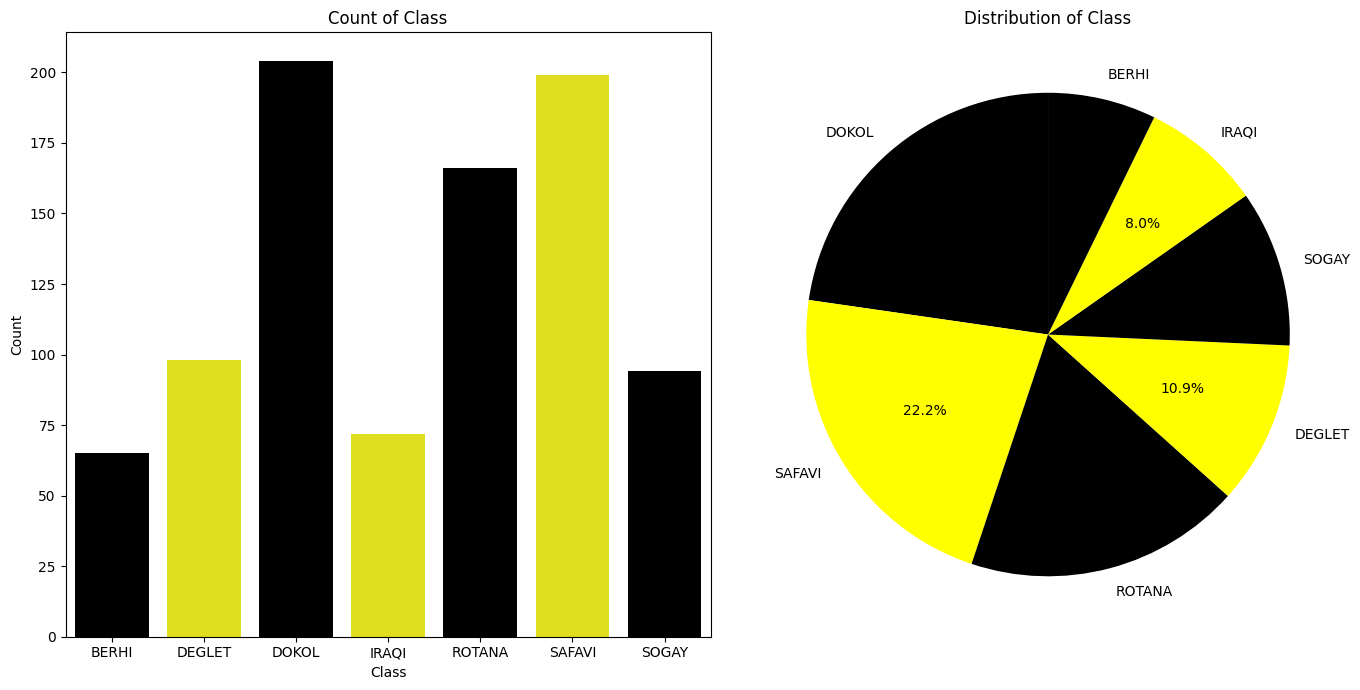

In [16]:
plot_column_distribution(ds, 'Class')

In [17]:
def plot_scatter(dataframe, column1, column2, hue_column=None, color_palette="coolwarm"):
    """
    Given a DataFrame and two column names, this function plots a scatter plot
    for the specified columns. Optionally, a hue column can be provided for coloring.

    Parameters:
    dataframe (pd.DataFrame): The input DataFrame.
    column1 (str): The first column name.
    column2 (str): The second column name.
    hue_column (str): The optional column name for hue in scatter plot.
    color_palette (str): The optional color palette for the plot. Defaults to "coolwarm".
    """
    if column1 not in dataframe.columns or column2 not in dataframe.columns:
        print(f"One or both columns '{column1}' and '{column2}' not found in the DataFrame.")
        return
    if hue_column and hue_column not in dataframe.columns:
        print(f"Hue column '{hue_column}' not found in the DataFrame.")
        return

    # Create a larger figure for better clarity
    plt.figure(figsize=(12, 8))
    
    # Scatter plot with or without hue
    if hue_column:
        sns.scatterplot(x=dataframe[column1], y=dataframe[column2], hue=dataframe[hue_column], palette=color_palette, s=100, edgecolor='black')
    else:
        sns.scatterplot(x=dataframe[column1], y=dataframe[column2], palette=color_palette, s=100, edgecolor='black')
    
    # Title and labels with customized font styles
    plt.title(f'{column1} vs {column2}', fontsize=16, fontweight='bold', color='darkblue')
    plt.xlabel(column1, fontsize=14, color='darkgreen')
    plt.ylabel(column2, fontsize=14, color='darkgreen')
    
    # Show the plot with a tight layout
    plt.tight_layout()
    plt.show()

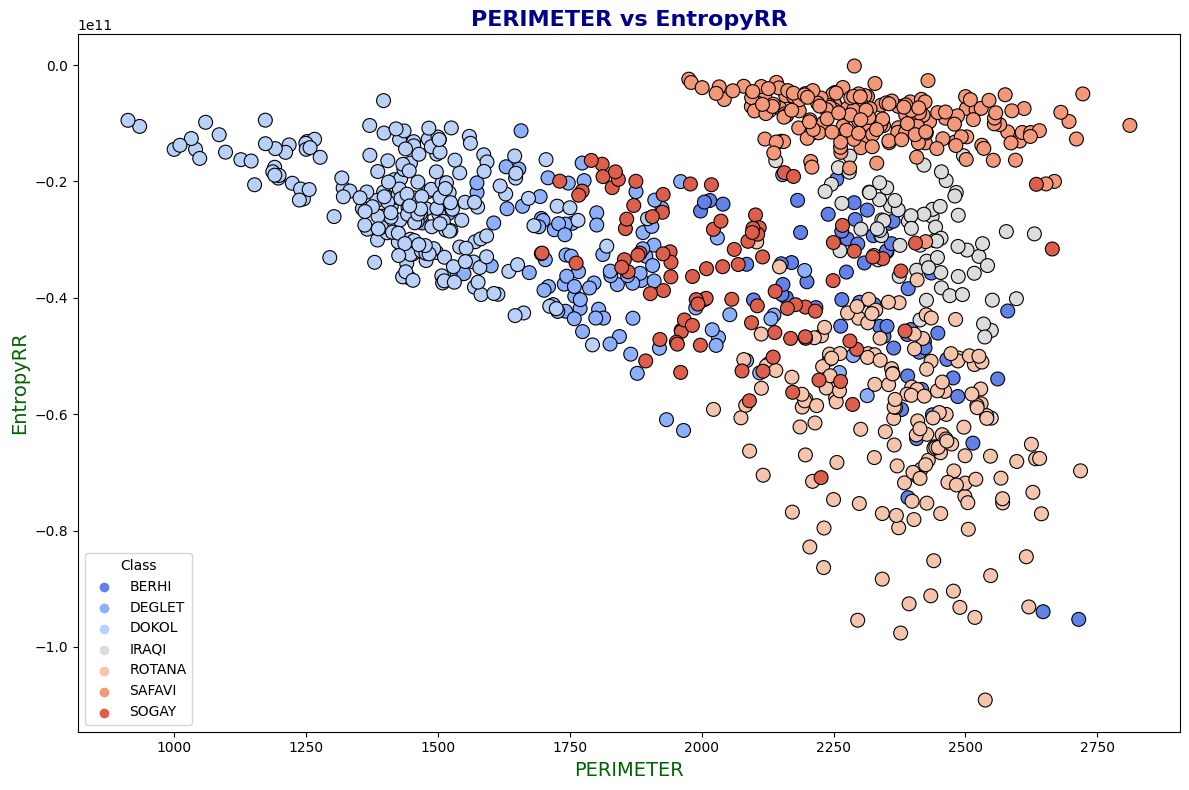

In [18]:
plot_scatter(ds, 'PERIMETER', 'EntropyRR', hue_column='Class')

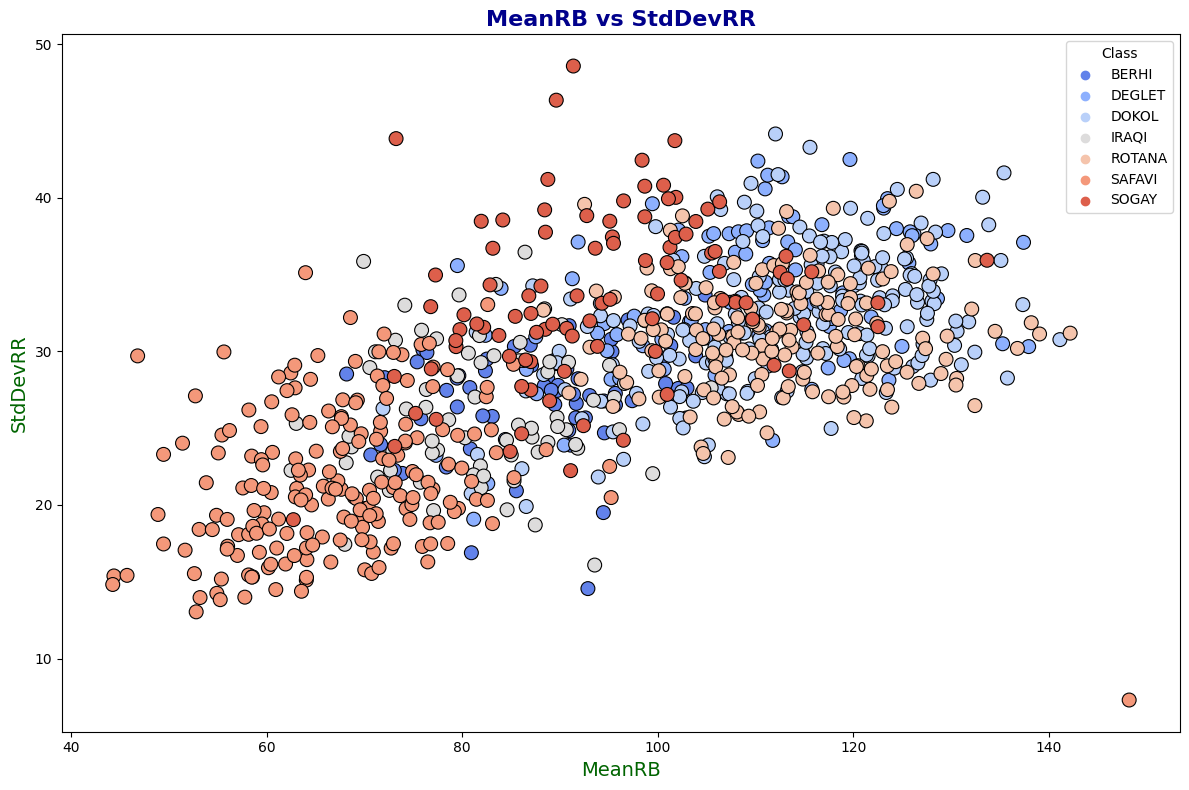

In [19]:
plot_scatter(ds, 'MeanRB', 'StdDevRR', hue_column='Class')

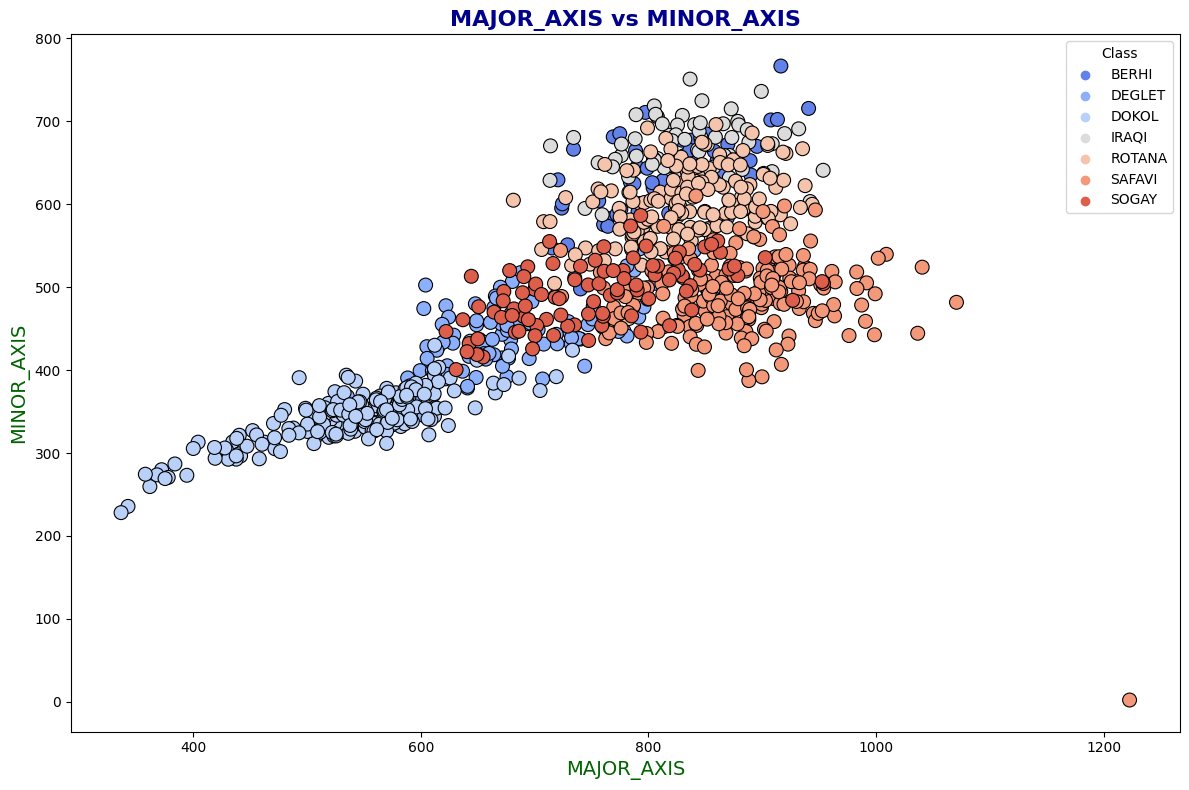

In [20]:
plot_scatter(ds, 'MAJOR_AXIS', 'MINOR_AXIS', hue_column='Class')

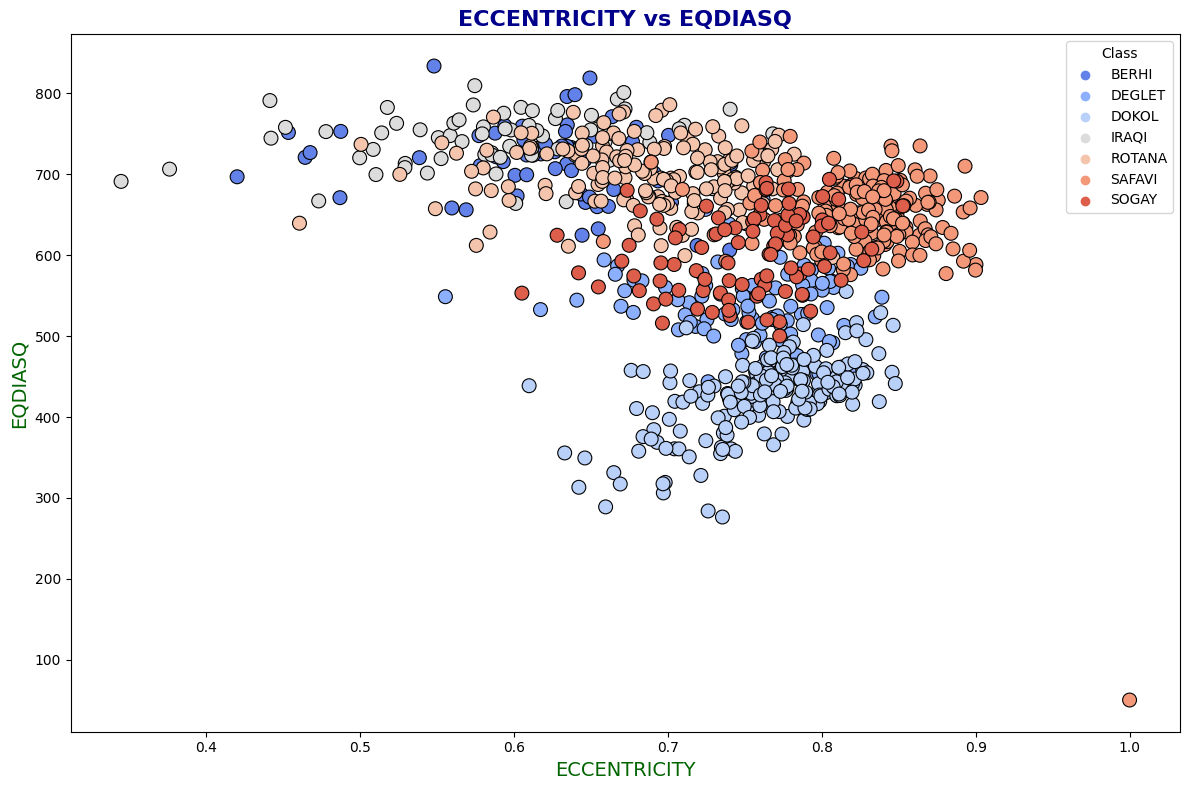

In [21]:
plot_scatter(ds, 'ECCENTRICITY', 'EQDIASQ', hue_column='Class')

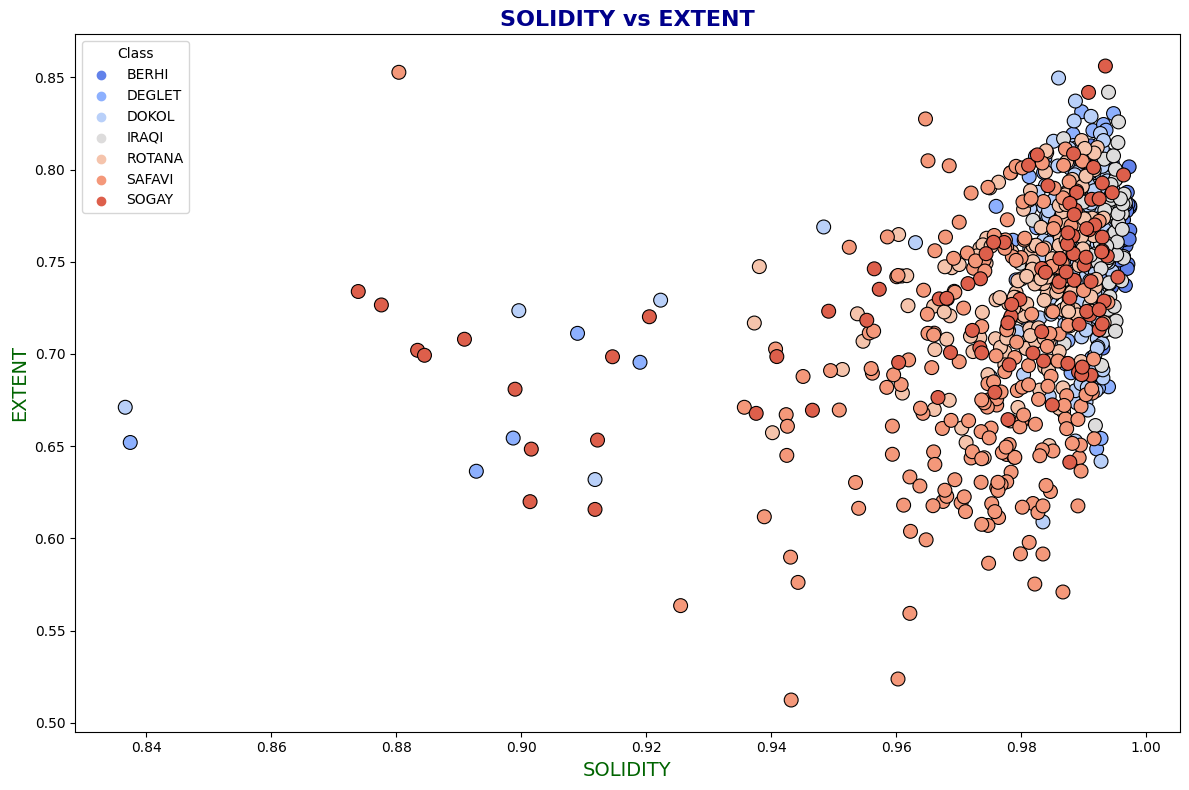

In [22]:
plot_scatter(ds, 'SOLIDITY', 'EXTENT', hue_column='Class')

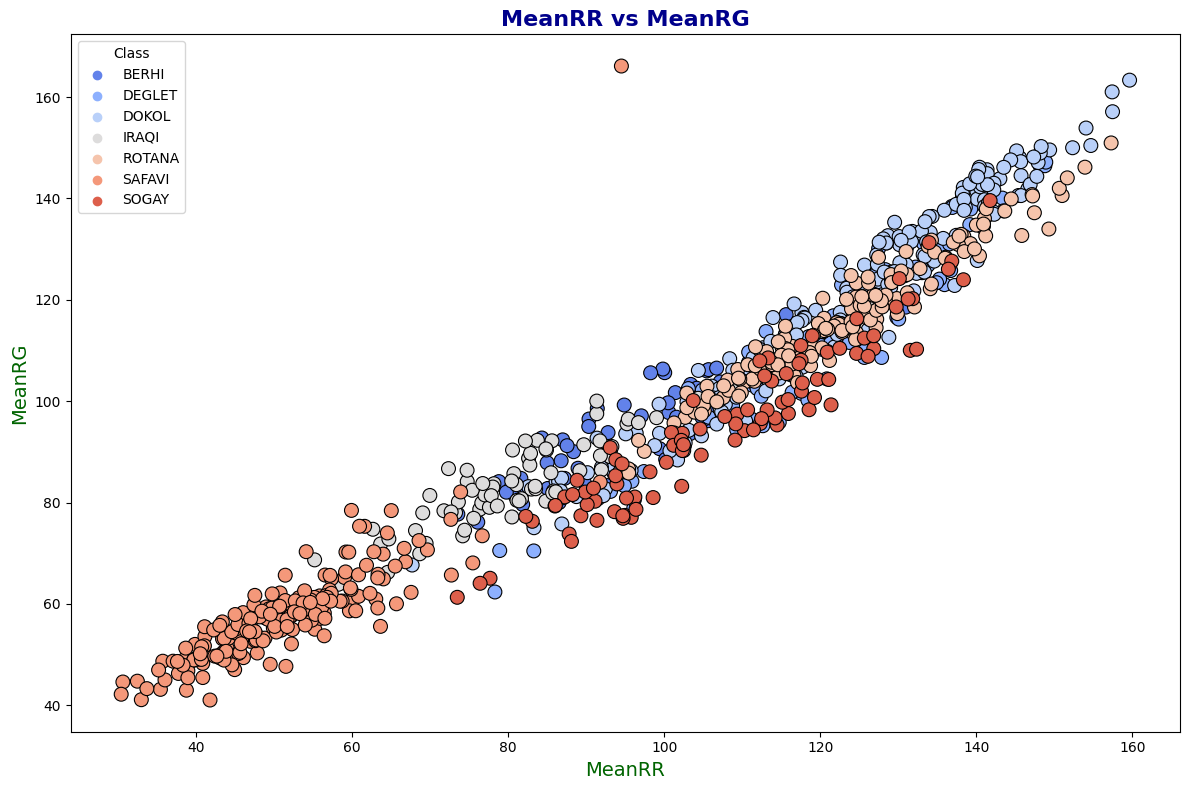

In [23]:
plot_scatter(ds, 'MeanRR', 'MeanRG', hue_column='Class')

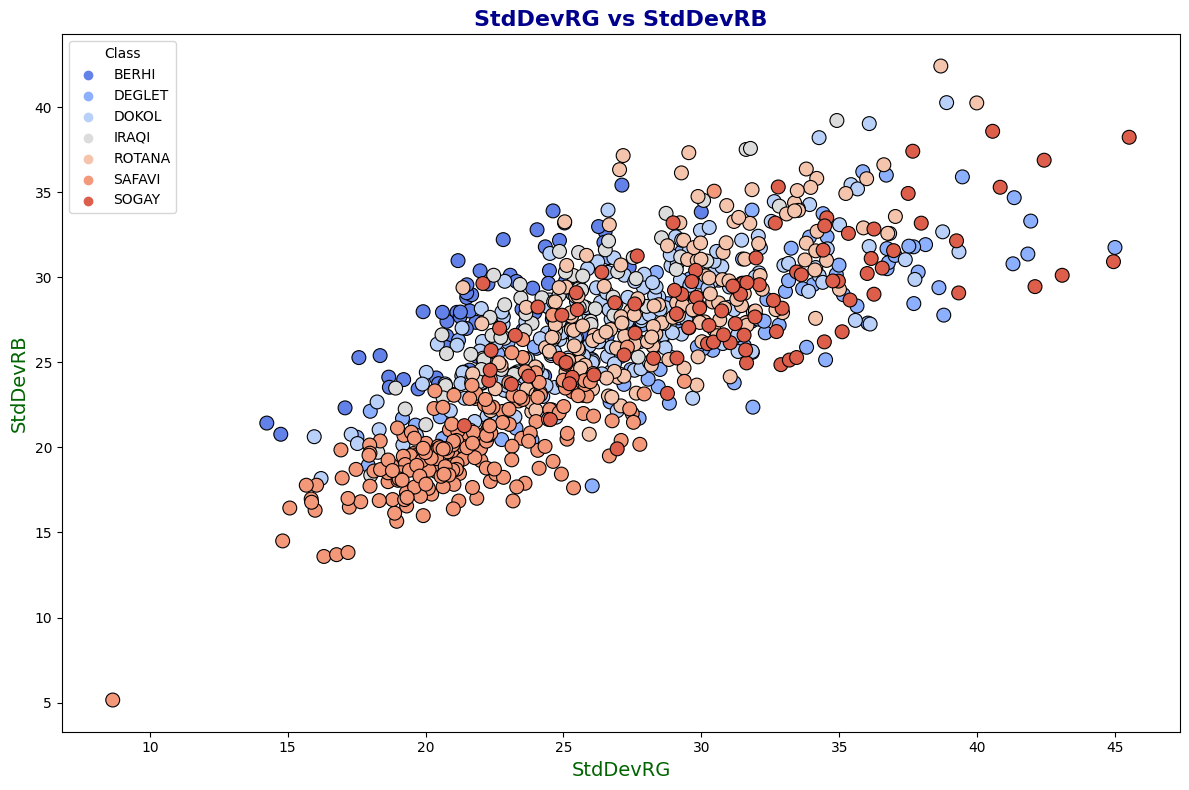

In [24]:
plot_scatter(ds, 'StdDevRG', 'StdDevRB', hue_column='Class')

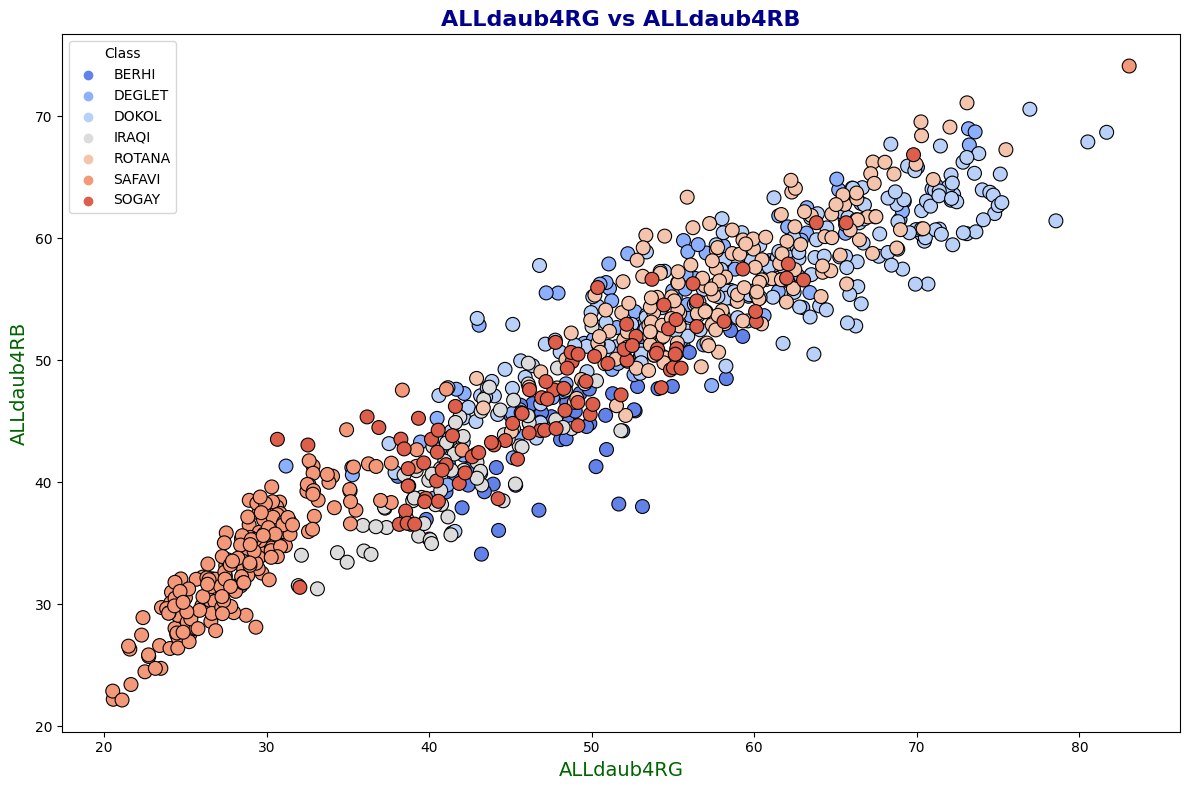

In [25]:
plot_scatter(ds, 'ALLdaub4RG', 'ALLdaub4RB', hue_column='Class')

## step 13: Outlier Detection

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_selected_numerical_boxplots(dataframe, features_to_plot, color_palette="Set2"):
    """
    Given a DataFrame and a list of features, this function plots boxplots
    for the specified numerical columns in a single figure with subplots.

    Parameters:
    dataframe (pd.DataFrame): The input DataFrame.
    features_to_plot (list): A list of feature names to plot boxplots for.
    color_palette (str): The optional color palette for the boxplots. Defaults to 'Set2'.
    """
    # Select numerical columns from the list of features
    numerical_columns = [col for col in features_to_plot if col in dataframe.columns and dataframe[col].dtype == 'float']
    
    if not numerical_columns:
        print("No numerical columns found in the provided features list.")
        return
    
    # Number of rows and columns for subplots
    num_cols = len(numerical_columns)
    num_plots_per_row = 3
    num_rows = (num_cols + num_plots_per_row - 1) // num_plots_per_row
    
    # Create subplots with better spacing
    fig, axes = plt.subplots(num_rows, num_plots_per_row, figsize=(15, num_rows * 5))
    axes = axes.flatten()
    
    for idx, column in enumerate(numerical_columns):
        sns.boxplot(data=dataframe, y=column, ax=axes[idx], palette=color_palette, fliersize=6, linewidth=2)
        
        # Title and styling for each boxplot
        axes[idx].set_title(f'{column}', fontsize=14, fontweight='bold', color='darkblue')
        axes[idx].set_xlabel('')
        axes[idx].set_ylabel('')

        # Add grid for better visibility
        axes[idx].grid(True, linestyle='--', alpha=0.7)

    # Remove any empty axes if the number of plots is less than grid slots
    for i in range(idx + 1, len(axes)):
        fig.delaxes(axes[i])

    # Tight layout for better spacing
    plt.tight_layout()
    plt.show()


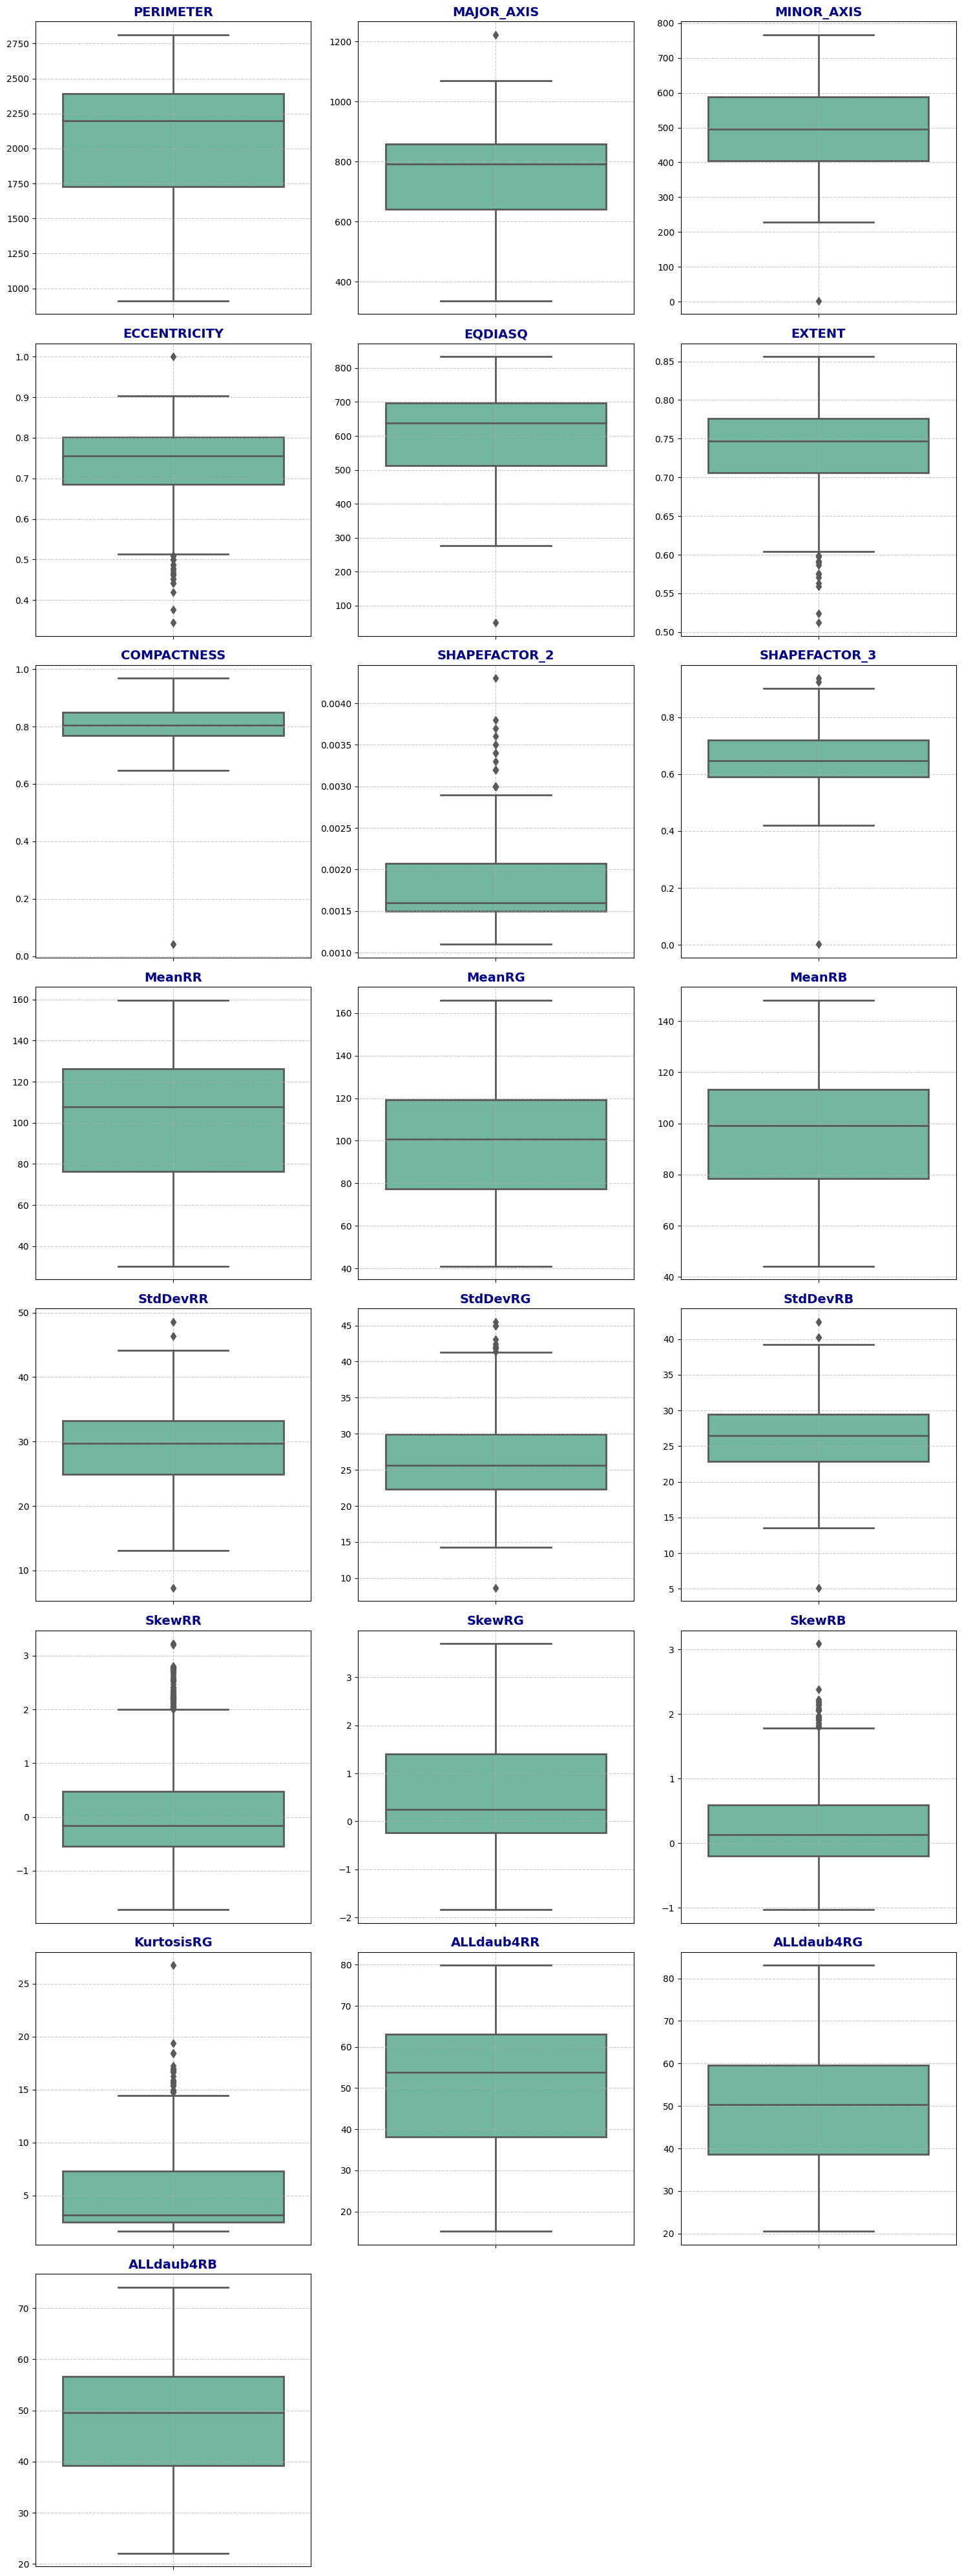

In [27]:
features_to_plot = ['PERIMETER', 'MAJOR_AXIS', 'MINOR_AXIS', 'ECCENTRICITY', 'EQDIASQ', 
                    'EXTENT', 'COMPACTNESS', 'SHAPEFACTOR_2', 'SHAPEFACTOR_3', 'MeanRR', 
                    'MeanRG', 'MeanRB', 'StdDevRR', 'StdDevRG', 'StdDevRB', 'SkewRR', 
                    'SkewRG', 'SkewRB', 'KurtosisRG', 'ALLdaub4RR', 'ALLdaub4RG', 'ALLdaub4RB']

# Call the function 
plot_selected_numerical_boxplots(ds, features_to_plot)


## step 14: Numarical Feature distribution

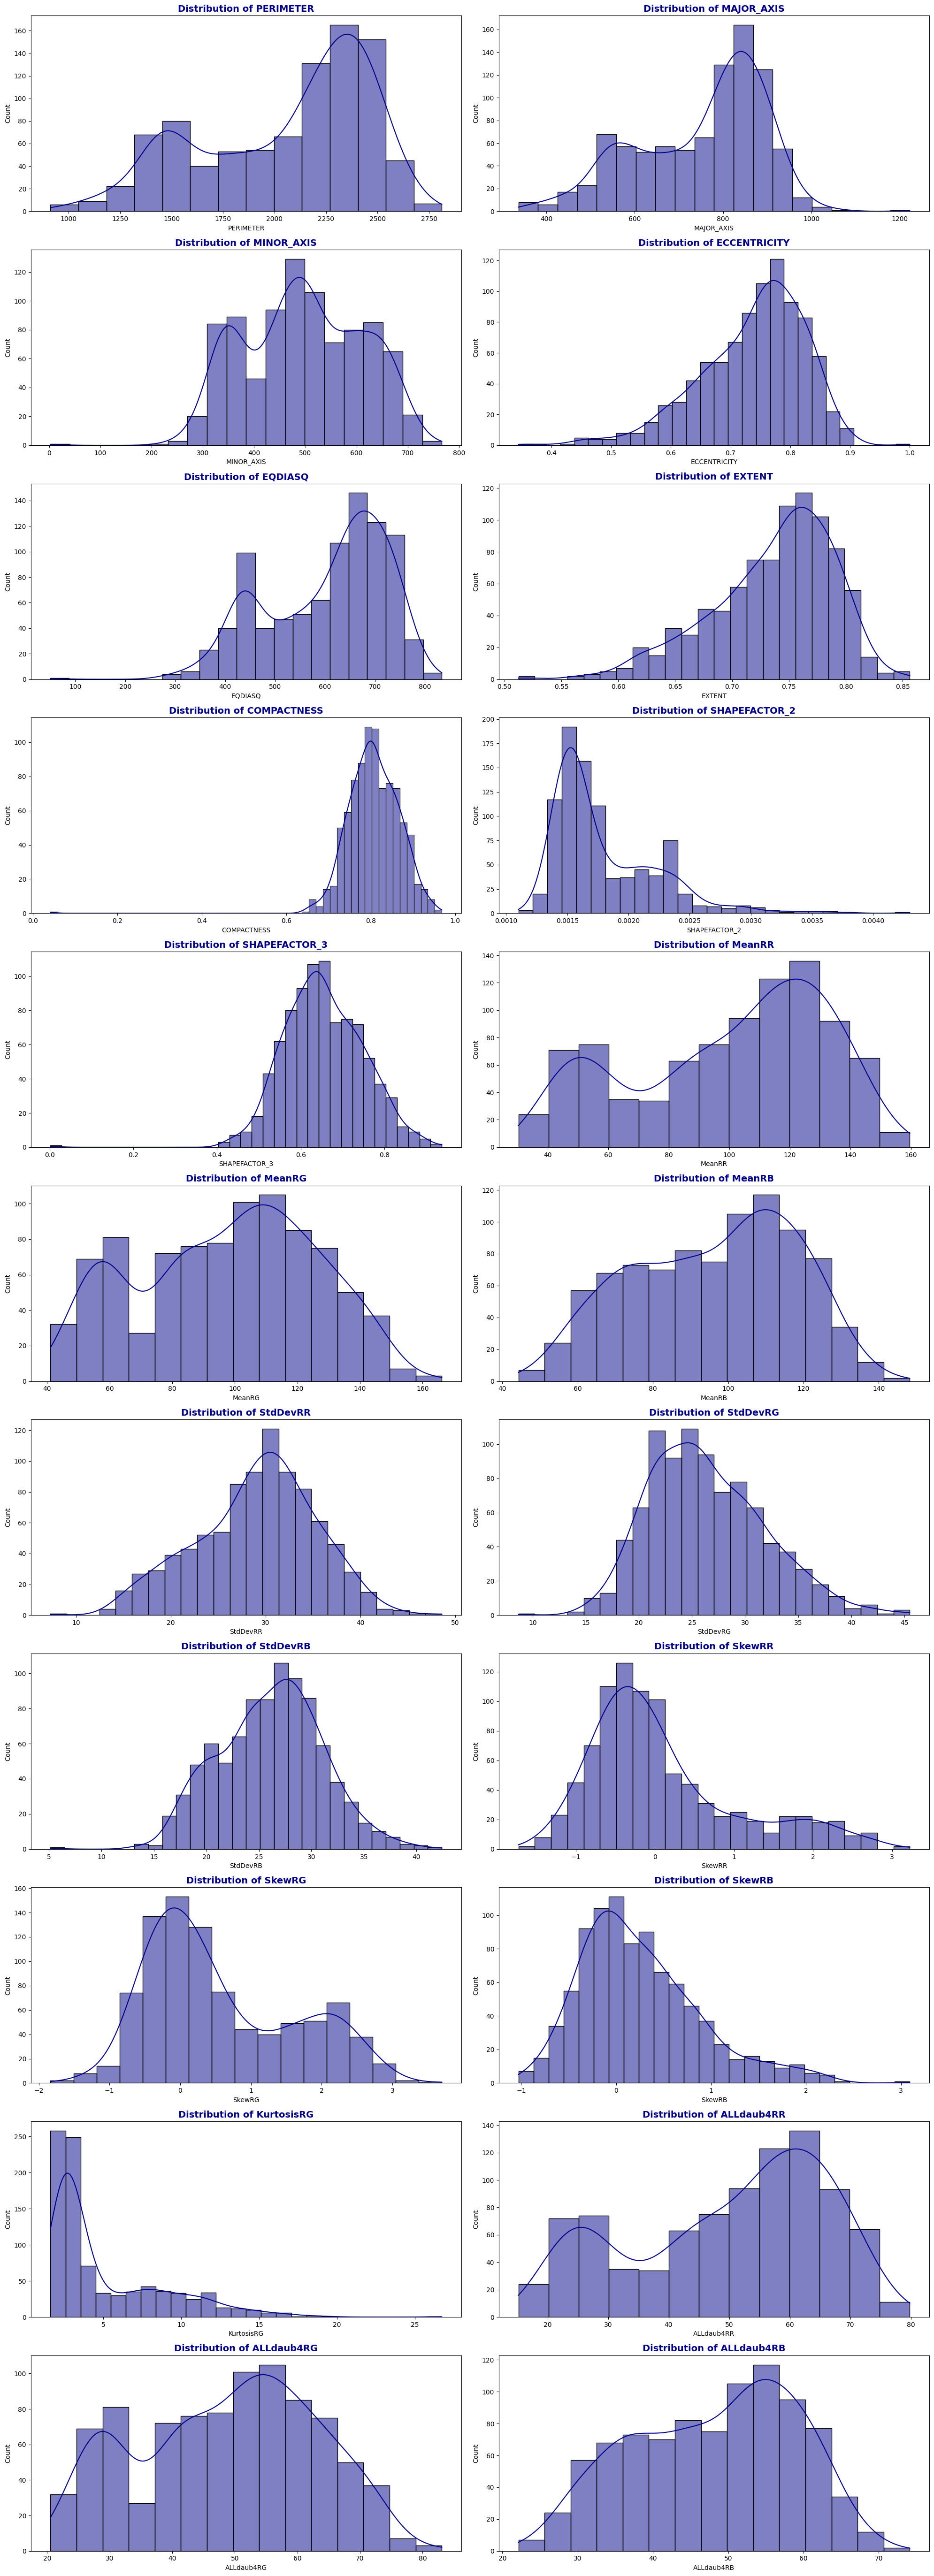

In [28]:
def plot_histograms_for_features(dataframe, features_to_plot, color_palette="darkblue"):
    """
    Given a DataFrame and a list of features, this function plots histograms
    for the specified features in a single figure with subplots.

    Parameters:
    dataframe (pd.DataFrame): The input DataFrame.
    features_to_plot (list): A list of feature names to plot histograms for.
    color_palette (str): The color palette for the histograms. Defaults to 'darkblue'.
    """
    # Validate if all features are in the dataframe
    missing_features = [feature for feature in features_to_plot if feature not in dataframe.columns]
    if missing_features:
        print(f"Warning: These features are missing from the dataframe: {', '.join(missing_features)}")
    
    # Set number of rows and columns for subplots
    num_features = len(features_to_plot)
    num_cols = 2
    num_rows = math.ceil(num_features / num_cols)

    # Create subplots with appropriate size
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, num_rows * 5))

    # Flatten axes array for easy iteration
    axes = axes.flatten()

    for i, feature in enumerate(features_to_plot):
        if feature in dataframe.columns:
            # Plot histogram for the current feature
            sns.histplot(data=dataframe, x=feature, kde=True, color=color_palette, ax=axes[i])

            # Set title and labels
            axes[i].set_title(f'Distribution of {feature}', fontsize=14, fontweight='bold', color='darkblue')
            axes[i].set_xlabel(feature)
            axes[i].set_ylabel('Count')

        # Hide any empty axes (in case the number of plots is less than available subplots)
        if i >= num_features:
            axes[i].axis('off')

    # Adjust layout 
    plt.tight_layout()

    # Show the plot
    plt.show()

# Call the function with the features_to_plot list
plot_histograms_for_features(ds, features_to_plot, color_palette="darkblue")

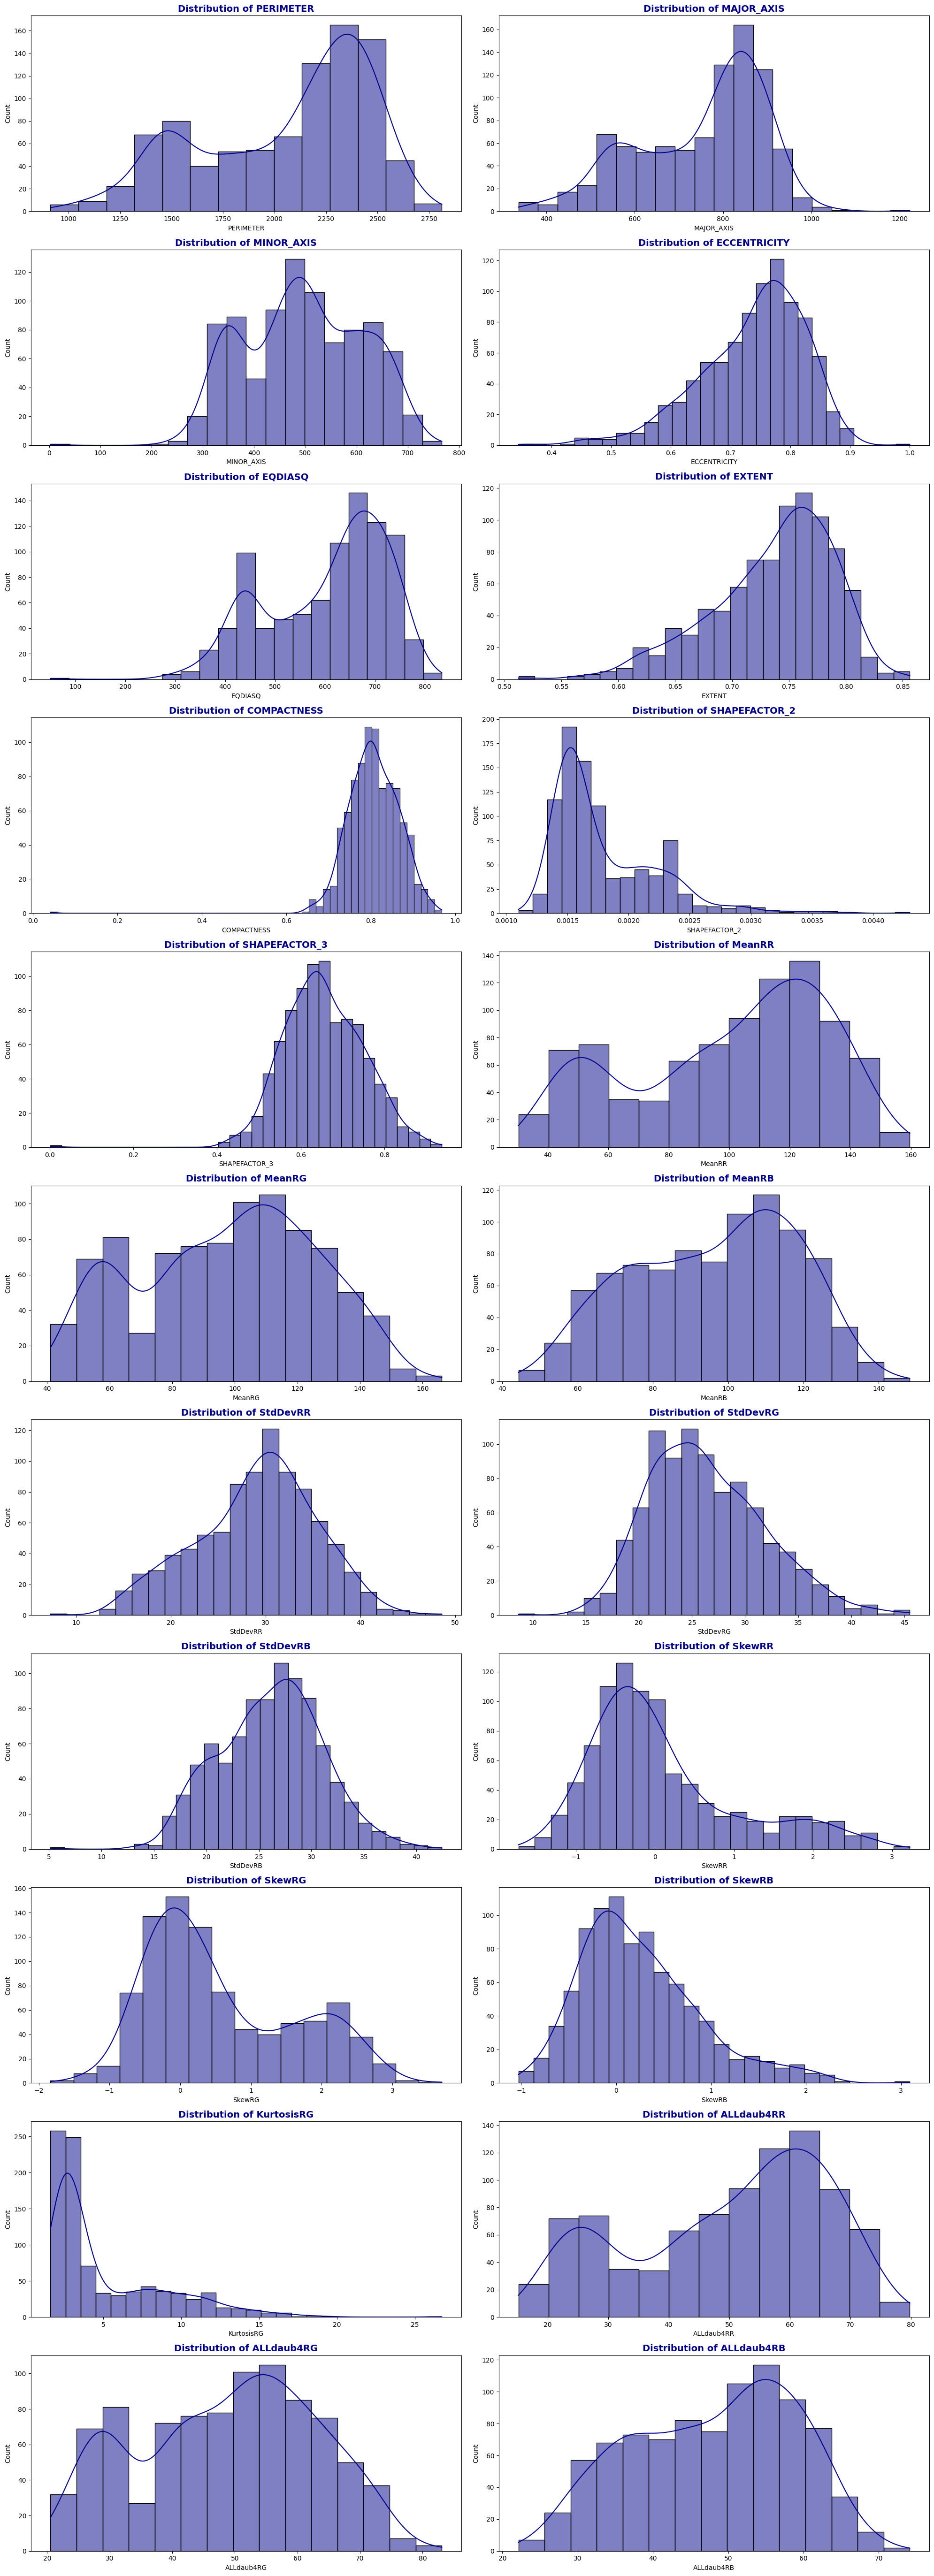

In [29]:
features_to_plot = ['PERIMETER', 'MAJOR_AXIS', 'MINOR_AXIS', 'ECCENTRICITY', 'EQDIASQ', 
                    'EXTENT', 'COMPACTNESS', 'SHAPEFACTOR_2', 'SHAPEFACTOR_3', 'MeanRR', 
                    'MeanRG', 'MeanRB', 'StdDevRR', 'StdDevRG', 'StdDevRB', 'SkewRR', 
                    'SkewRG', 'SkewRB', 'KurtosisRG', 'ALLdaub4RR', 'ALLdaub4RG', 'ALLdaub4RB']

# Call the function 
plot_histograms_for_features(ds, features_to_plot)

## step 15: Encoding

In [30]:
def encode(df):
    """
    Encodes categorical columns in a DataFrame using Label Encoding.
    
    Parameters:
    df (pd.DataFrame): The DataFrame to encode.
    
    Returns:
    pd.DataFrame: The DataFrame with encoded categorical columns.
    """
    for col in df.columns:
        if df[col].dtype == 'object' or df[col].dtype.name == 'category':
            le = LabelEncoder()
            df[col] = le.fit_transform(df[col].astype(str))  # Ensure correct handling of non-numeric categories
    return df

# Example usage
df = encode(df)
print_boxed_heading("Successfully Encoded")


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
| Successfully | Encoded |
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


## Step 16: Correlation Analysis

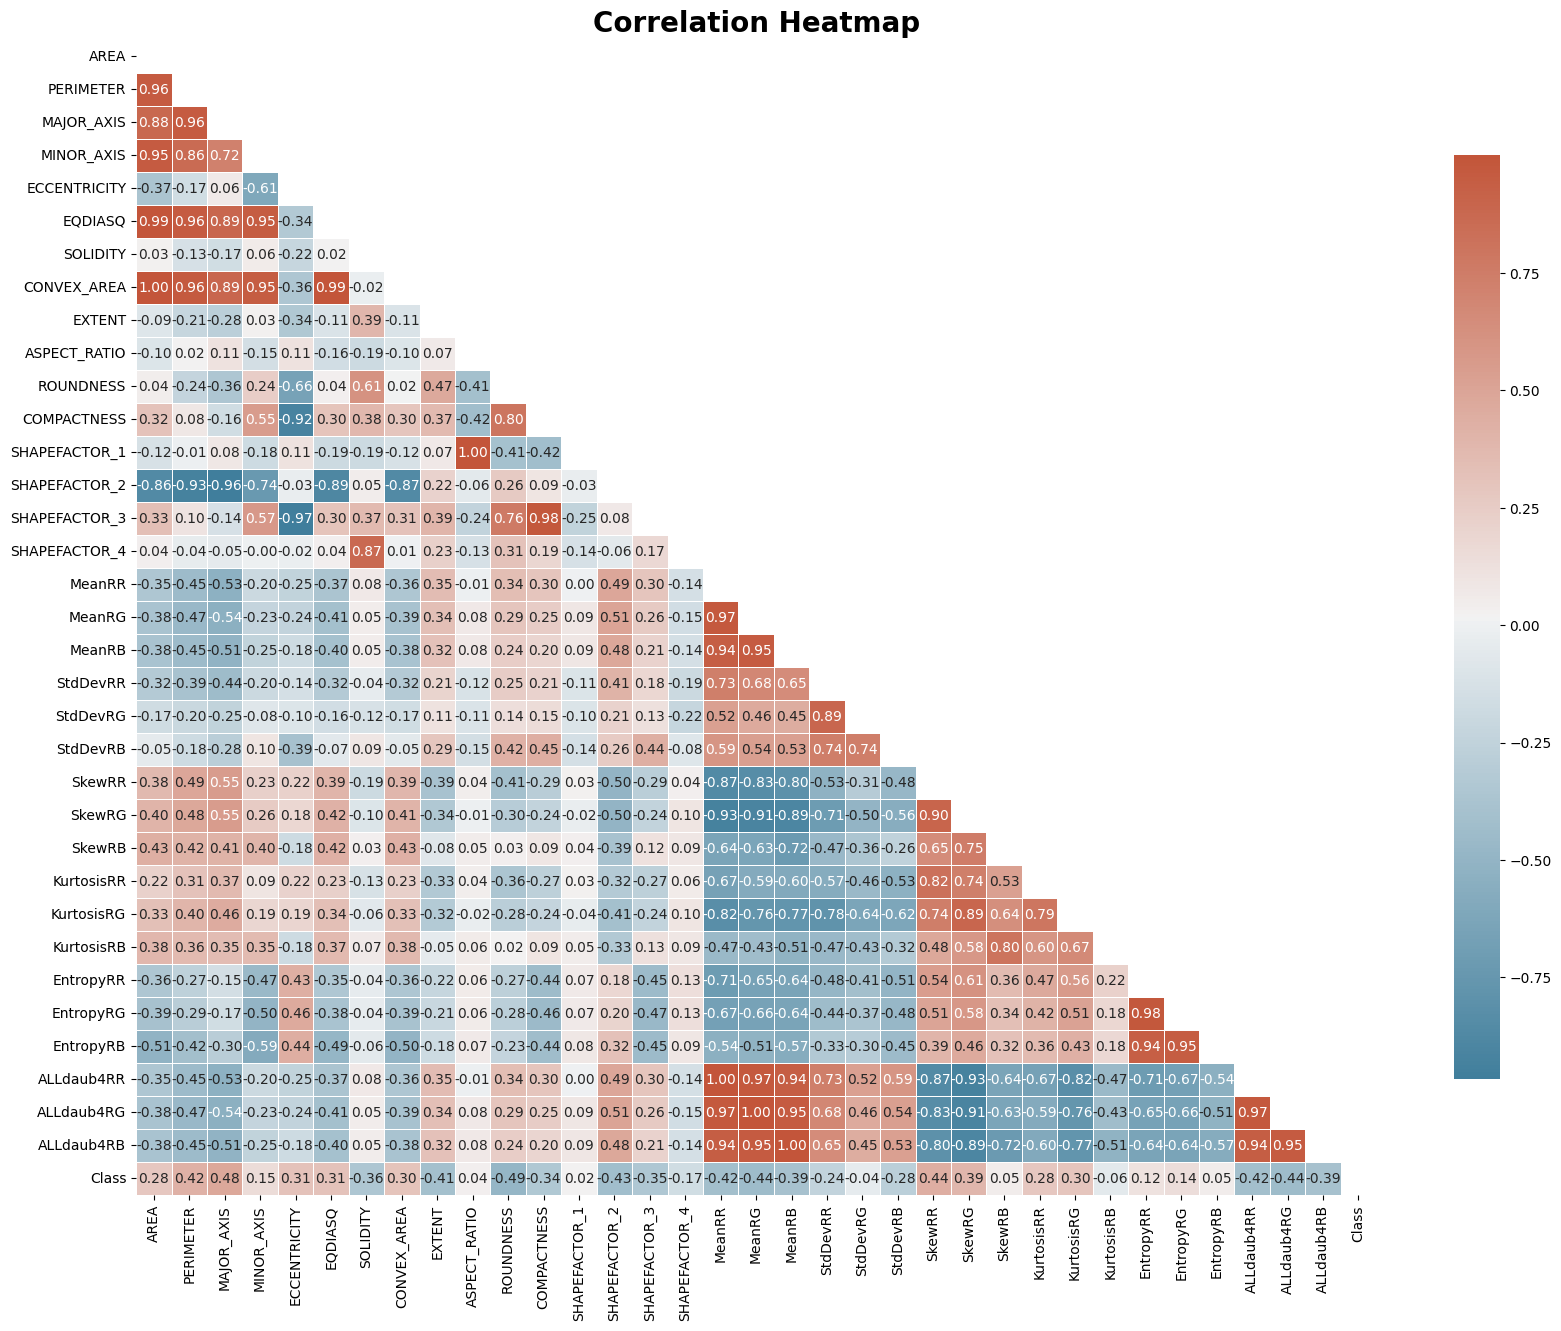

In [31]:
# Set the figure size
plt.figure(figsize=(20, 15))

# Compute correlation matrix
corr = df.corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set the color palette for the heatmap
palette = sns.diverging_palette(230, 20, as_cmap=True)  # Diverging palette from blue to red

# Plot the heatmap
sns.heatmap(corr, annot=True, mask=mask, cmap=palette, fmt=".2f", linewidths=0.5, cbar=True, 
            annot_kws={"size": 10}, cbar_kws={"shrink": 0.8})

# Set the title
plt.title("Correlation Heatmap", fontsize=20, fontweight='bold')

# Show the plot
plt.show()

## step 17: Modeling

In [32]:
from sklearn.model_selection import train_test_split

X = df.drop('Class', axis=1)  # Features (excluding 'Class')
y = df['Class']  # Target variable

# Perform the split
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, y, test_size=0.1, random_state=42)

# Displaying the shape of the training and testing sets
def print_boxed_heading(message):
    print(f"+{'-' * (len(message) + 2)}+")
    print(f"| {message} |")
    print(f"+{'-' * (len(message) + 2)}+")

# Show shapes in boxed headings
print_boxed_heading(f"Training set shape - X: {X_Train.shape}, y: {Y_Train.shape}")
print_boxed_heading(f"Testing set shape - X: {X_Test.shape}, y: {Y_Test.shape}")


+----------------------------------------------+
| Training set shape - X: (808, 34), y: (808,) |
+----------------------------------------------+
+-------------------------------------------+
| Testing set shape - X: (90, 34), y: (90,) |
+-------------------------------------------+


In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb
from catboost import CatBoostClassifier

# Helper function for printing boxed headings
def print_boxed_heading(message):
    print(f"+{'-' * (len(message) + 2)}+")
    print(f"| {message} |")
    print(f"+{'-' * (len(message) + 2)}+")

# Function for model evaluation
def evaluate_model(model_name, X_Train, Y_Train, X_Test, Y_Test, palette="Blues"):
    """
    Evaluates the performance of a given model on the training and testing datasets.

    Parameters:
    model_name (str): The model to evaluate ('xgboost', 'random_forest', 'lightgbm', 'catboost').
    X_Train (pd.DataFrame): The feature set for training.
    Y_Train (pd.Series): The target variable for training.
    X_Test (pd.DataFrame): The feature set for testing.
    Y_Test (pd.Series): The target variable for testing.
    palette (str): The color palette for the confusion matrix heatmap.
    """
    # Define models dictionary
    models = {
        "xgboost": xgb.XGBClassifier(objective="multi:softprob", n_estimators=500, max_depth=6, random_state=42, eval_metric="mlogloss"),
        'random_forest': RandomForestClassifier(n_estimators=500, random_state=42),
        'lightgbm': lgb.LGBMClassifier(objective="multiclass", n_estimators=500, max_depth=6, random_state=42, metric="multi_logloss", verbose=-1),
        'catboost': CatBoostClassifier(iterations=1000, depth=6, eval_metric="MultiClass", random_state=42, verbose=0)
    }

    # Check if model_name is valid
    if model_name not in models:
        print(f"Model {model_name} is not supported.")
        return

    # Initialize and train the model
    model = models[model_name]
    model.fit(X_Train, Y_Train)
    
    # Make predictions
    Y_pred = model.predict(X_Test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(Y_Test, Y_pred)
    precision = precision_score(Y_Test, Y_pred, average='weighted')
    recall = recall_score(Y_Test, Y_pred, average='weighted')
    cm = confusion_matrix(Y_Test, Y_pred)

    # Print the results
    print_boxed_heading("Model Evaluation:")
    print_boxed_heading(f"Accuracy of {model_name}: {accuracy:.2f}")
    print_boxed_heading(f"Precision of {model_name}: {precision:.2f}")
    print_boxed_heading(f"Recall of {model_name}: {recall:.2f}")
    
    # Plot confusion matrix
    print_boxed_heading("Confusion Matrix:")
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap=palette, cbar=False)
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Example usage:
# evaluate_model("xgboost", X_Train, Y_Train, X_Test, Y_Test)


## Step 17: XGB

+-------------------+
| Model Evaluation: |
+-------------------+
+---------------------------+
| Accuracy of xgboost: 0.92 |
+---------------------------+
+----------------------------+
| Precision of xgboost: 0.93 |
+----------------------------+
+-------------------------+
| Recall of xgboost: 0.92 |
+-------------------------+
+-------------------+
| Confusion Matrix: |
+-------------------+


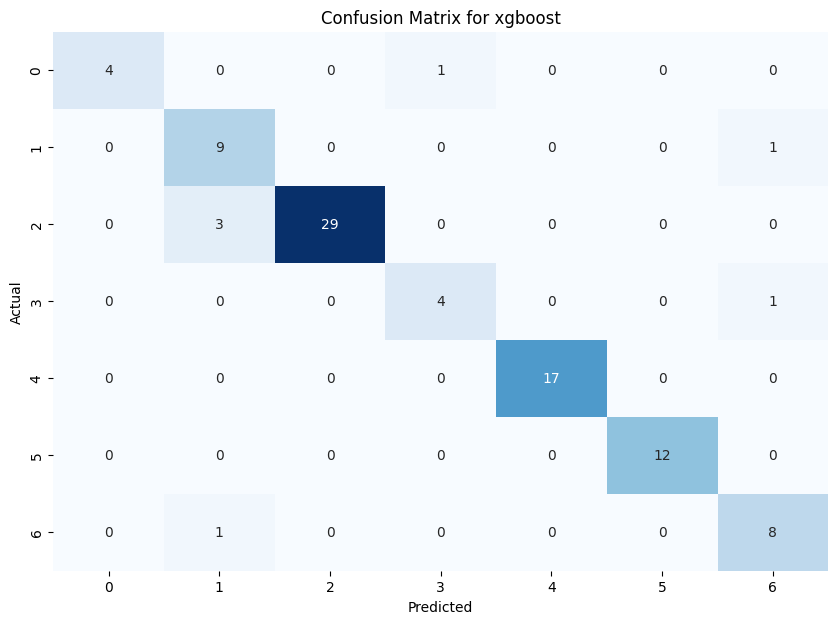

In [34]:
# Assuming you already have your data split like this:
X = df.drop('Class', axis=1)
y = df['Class']
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, y, test_size=0.1, random_state=42)

# Now call the evaluate_model function with the correct arguments
evaluate_model("xgboost", X_Train, Y_Train, X_Test, Y_Test)

In [35]:
def evaluate_model(model_name):   
    models = {
        "xgboost": xgb.XGBClassifier(objective= "multi:softprob", n_estimators = 500, max_depth = 6, random_state = 42, eval_metric= "mlogloss"),
        'random_forest': RandomForestClassifier(n_estimators=500, random_state = 42),
        'lightgbm': lgb.LGBMClassifier(objective= "multiclass", n_estimators= 500, max_depth= 6, random_state= 42, metric= "multi_logloss", verbose=-1),
        'catboost': CatBoostClassifier(iterations= 1000, depth= 6, eval_metric= "MultiClass", random_state= 42, verbose=0)
    }

    model = models[model_name]
    model.fit(X_Train, Y_Train)
    Y_pred = model.predict(X_Test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(Y_Test, Y_pred)
    precision = precision_score(Y_Test, Y_pred, average='weighted') 
    recall = recall_score(Y_Test, Y_pred, average='weighted')  
    cm = confusion_matrix(Y_Test, Y_pred)

    # Print The Results
    print_boxed_heading("Model Evaluation:")
    print_boxed_heading(f"The Accuracy Of {model_name} is: {accuracy:.2f}")
    print_boxed_heading(f"The Precision Of {model_name} is: {precision:.2f}")
    print_boxed_heading(f"The Recall Of {model_name} is: {recall:.2f}")
    print_boxed_heading("Confusion Matrix:")
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap=palette, cbar=False)
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

+-------------------+
| Model Evaluation: |
+-------------------+
+----------------------------------------+
| The Accuracy Of random_forest is: 0.91 |
+----------------------------------------+
+-----------------------------------------+
| The Precision Of random_forest is: 0.93 |
+-----------------------------------------+
+--------------------------------------+
| The Recall Of random_forest is: 0.91 |
+--------------------------------------+
+-------------------+
| Confusion Matrix: |
+-------------------+


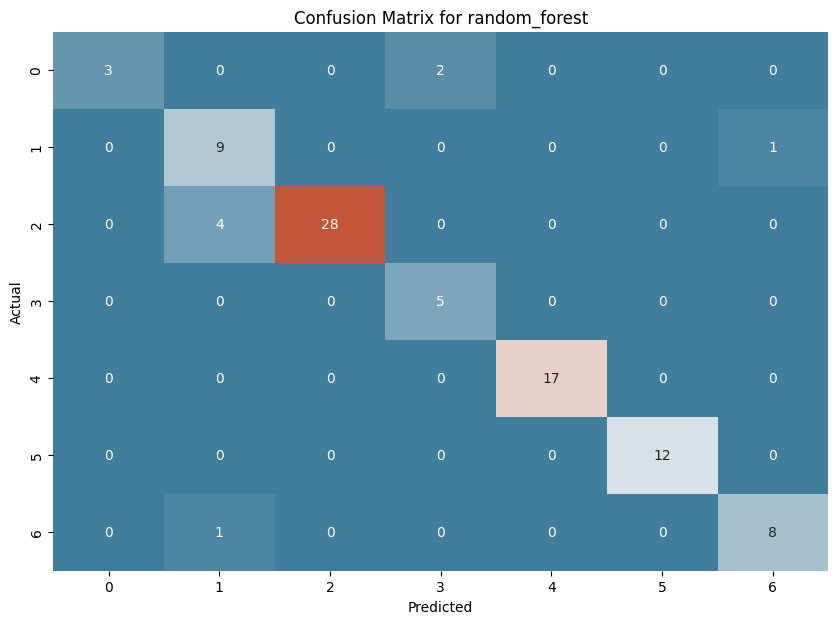

In [36]:
evaluate_model("random_forest")

+-------------------+
| Model Evaluation: |
+-------------------+
+-----------------------------------+
| The Accuracy Of lightgbm is: 0.87 |
+-----------------------------------+
+------------------------------------+
| The Precision Of lightgbm is: 0.89 |
+------------------------------------+
+---------------------------------+
| The Recall Of lightgbm is: 0.87 |
+---------------------------------+
+-------------------+
| Confusion Matrix: |
+-------------------+


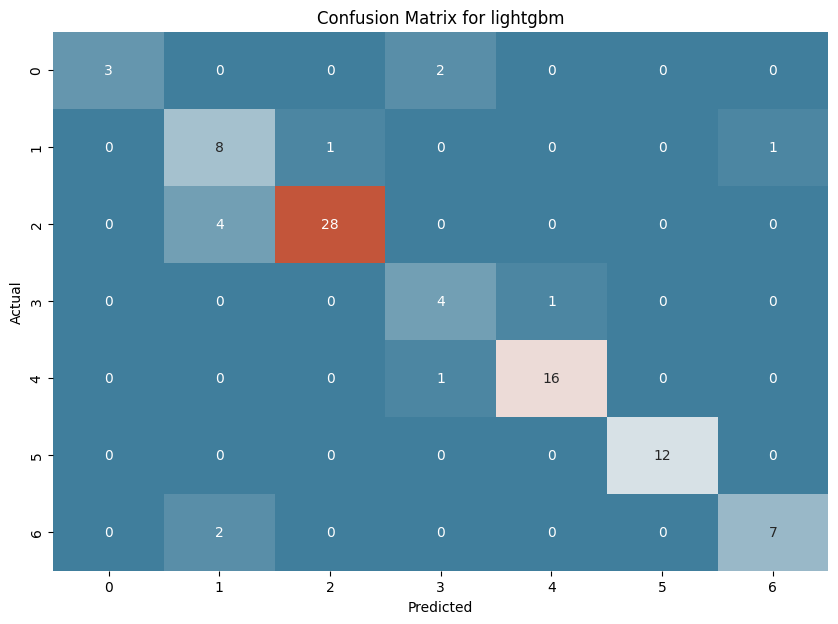

In [37]:
evaluate_model("lightgbm")

+-------------------+
| Model Evaluation: |
+-------------------+
+-----------------------------------+
| The Accuracy Of catboost is: 0.90 |
+-----------------------------------+
+------------------------------------+
| The Precision Of catboost is: 0.92 |
+------------------------------------+
+---------------------------------+
| The Recall Of catboost is: 0.90 |
+---------------------------------+
+-------------------+
| Confusion Matrix: |
+-------------------+


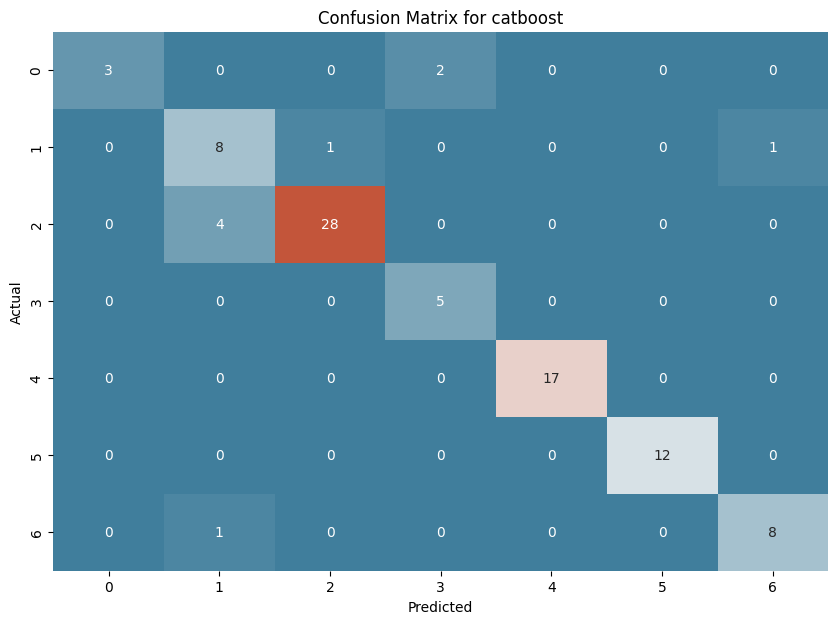

In [38]:
evaluate_model("catboost")